In [30]:
import os #  for file operations
import numpy as np #  for numerical processing
import pandas as pd #   data frames
import matplotlib.pyplot as plt #  plotting library
import seaborn as sns #   statistical data visualization
from sklearn.model_selection import train_test_split # modeling
from sklearn.linear_model import LinearRegression # modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #modeling

In [31]:
Data_path = '/'.join(os.path.abspath('').split('/')[:-4])+'automobileEDA.csv'
df = pd.read_csv(Data_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [32]:
# get features
x = df.drop('price', axis=1) # independent features
y = df['price']

In [34]:
# random_state = shuffles from the fixed position

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
x = df['highway-mpg'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)


In [36]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [37]:
y_pred = model.predict(x)
y_mean = y.mean()

ssres = ((y_pred - y_mean )** 2).sum()
sstotal = ((y-y_mean)**2).sum()
r_squared = ssres / sstotal
print(f"R_squared: {r_squared:.4f}")

R_squared: 0.4966


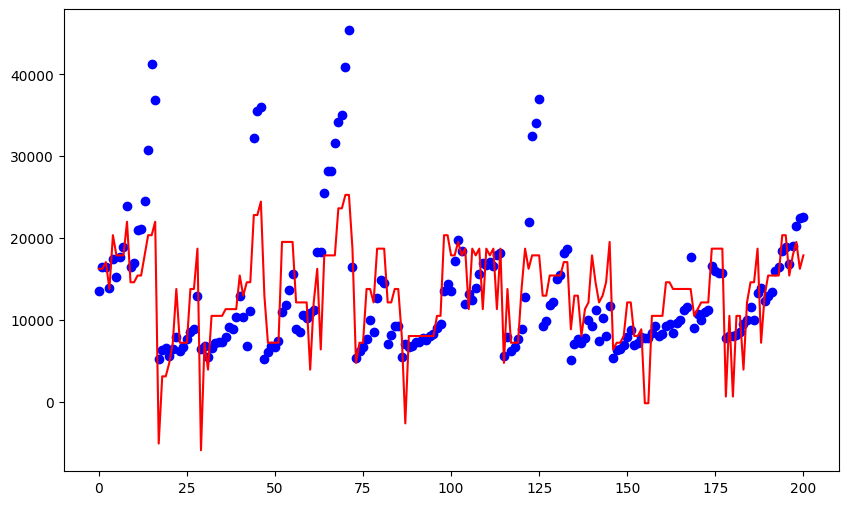

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, y, label='Actual data', color='Blue')
plt.plot(df.index, y_pred, label='Predicted value', color='Red')
plt.show()